# COMP30760 Assignment 2 - Task 2

In this task we will analyse and compare the time series of the stock data collected in task 1.


In [401]:
import json
from pathlib import Path
from datetime import datetime
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
from collections import Counter
import re
%matplotlib inline

In [402]:
#path where tha data is stored 
path = "/Users/sagarmahajan/Assignment2_data/"

#List of Automobile companies well collected data of
Companies = ["Honda Motor Company", "Toyota Motor Corporation", "Ford Motor Company" , "General Motors Company"]

#fontsize for all the graphs
fontsize = 13

## Data Processing

Now we will will fetch the data from the directory.

In [403]:
df_Companies = {}
for company in Companies:
    filepath = path
    filepath += company
    filepath += ".csv"
    df_Companies[company] = pd.read_csv(filepath)

In [404]:
df_Companies[Companies[0]]

,Unnamed: 0,Stock,Year,Month,Day,Open,High,Low,Close
0,0,HMC,2019,10,1,26.549999,26.580000,26.049999,26.150000
1,1,HMC,2019,10,2,25.850000,25.889999,25.620001,25.709999
2,2,HMC,2019,10,3,25.540001,25.730000,25.370001,25.730000
3,3,HMC,2019,10,4,25.760000,25.950001,25.719999,25.950001
4,4,HMC,2019,10,7,25.250000,25.350000,25.150000,25.170000
...,...,...,...,...,...,...,...,...,...
500,183,HMC,2021,9,24,30.820000,31.000000,30.760000,30.950001
501,184,HMC,2021,9,27,31.150000,31.500000,31.070000,31.469999
502,185,HMC,2021,9,28,31.500000,31.750000,31.360001,31.600000
503,186,HMC,2021,9,29,31.500000,31.750000,31.360001,31.600000


To plot the time series, we will change the index of the dataframes to date. We will use the "Day", "Month" and "Year" columns to form the date index and drop them afterwards. We will also drop the "Stock" and "Unnamed: 0" columns as they are not required for time series analysis.  

In [405]:
df_Companies_daily = df_Companies.copy()

for company in Companies:
    df_Companies_daily[company]["dates"] = "" + df_Companies_daily[company]["Day"].astype(str) + "-" + df_Companies_daily[company]["Month"].astype(str) + "-" + df_Companies_daily[company]["Year"].astype(str)
    df_Companies_daily[company]['Date'] = pd.to_datetime(df_Companies_daily[company]['dates'], format='%d-%m-%Y')
    df_Companies_daily[company].drop(["Day","Year", "Month", "dates","Unnamed: 0", "Stock"], axis=1, inplace = True)
    df_Companies_daily[company].set_index("Date", inplace=True)
    df_Companies_daily[company].to_string()

Below is the final dataframe we will use to conduct the time series analysis.

In [406]:
df_Companies_daily[Companies[0]]

,Open,High,Low,Close
Date,,,,
2019-10-01,26.549999,26.580000,26.049999,26.150000
2019-10-02,25.850000,25.889999,25.620001,25.709999
2019-10-03,25.540001,25.730000,25.370001,25.730000
2019-10-04,25.760000,25.950001,25.719999,25.950001
2019-10-07,25.250000,25.350000,25.150000,25.170000
...,...,...,...,...
2021-09-24,30.820000,31.000000,30.760000,30.950001
2021-09-27,31.150000,31.500000,31.070000,31.469999
2021-09-28,31.500000,31.750000,31.360001,31.600000


## Data Analysis

### Daily Frequency
We will start by plotting the time series for all 4 companies at daily frequency.

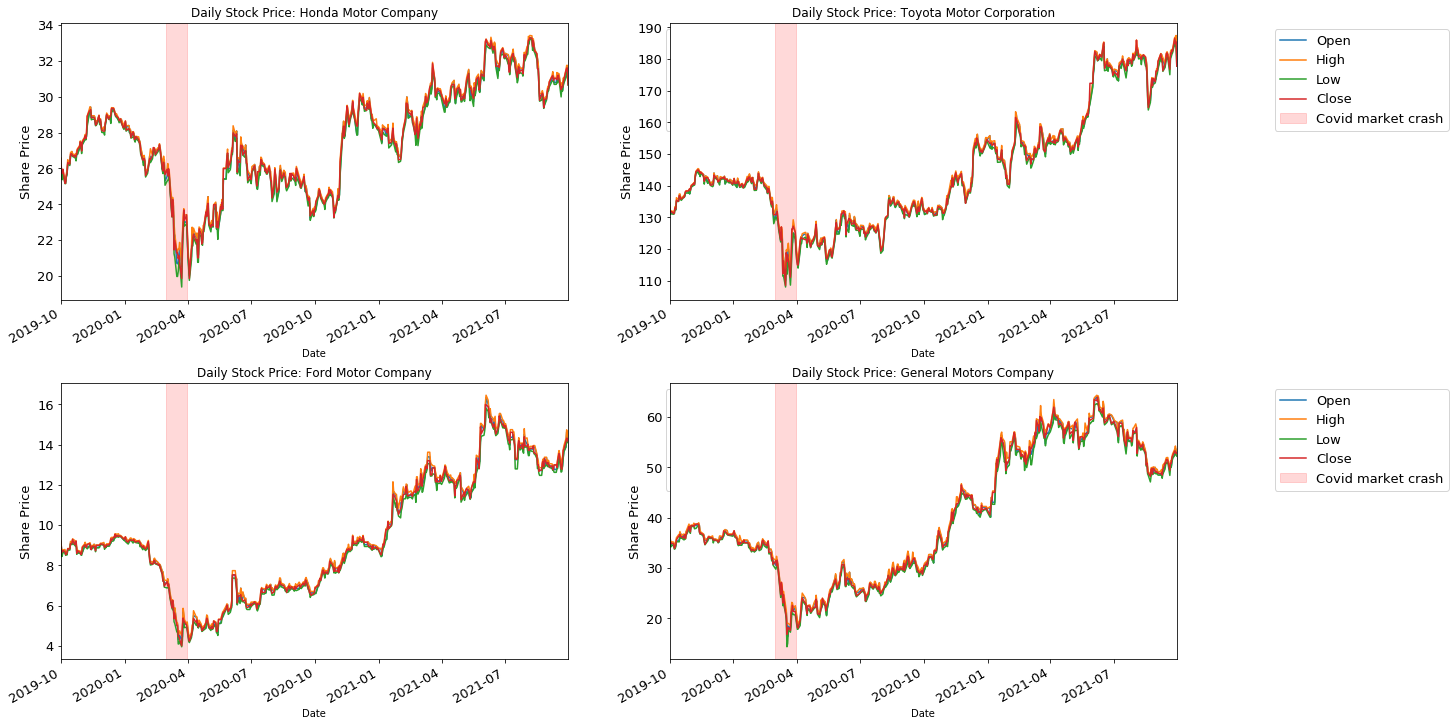

In [407]:
fig = plt.figure(figsize=(20,13))
for i, company in enumerate(Companies):
    axc = fig.add_subplot(2, 2, i+1)
    p = df_Companies_daily[company].plot(ax = axc, fontsize=13)
    fig.subplots_adjust(hspace = 0.3)
    p.set_title("Daily Stock Price: %s" % company)
    p.axvspan(mdates.date2num(datetime(2020,3,1)), mdates.date2num(datetime(2020,3,31)), 
           label="Covid market crash",color="red", alpha=0.15)
    p.set_ylabel("Share Price",fontsize=13);
    p.legend(bbox_to_anchor=(1.18, 1), fontsize=fontsize)

There is a lot of similarity in the trend of these time series. All the stock prices went down around March-April 2020 and they gradually increased post that. The March crash is highlighted with the red span. This downfall must have been due to the Market crash caused by the coronavirus outbreak. Although all the stock prices are increasing post market crash, the rate at which its increasing and the time they took to recover from the crash is different for each company. This can be better analysed by plotting the time series at monthly frequency.

### Monthly Frequency

below is the code to group the daily data into months by taking the average of the stock prices.


In [408]:
df_Companies_Monthly = {}
for company in Companies:
    groups = df_Companies_daily[company].groupby(pd.Grouper(freq='M'))
    df_Companies_Monthly[company] = groups.agg({'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean'})
df_Companies_Monthly[company].head(10)

,Open,High,Low,Close
Date,,,,
2019-10-31,35.973182,36.411818,35.463636,35.900000
2019-11-30,37.314210,37.491579,36.861578,37.157894
2019-12-31,36.130555,36.347222,35.852778,36.069445
2020-01-31,35.014000,35.293500,34.605500,34.901001
2020-02-29,34.034117,34.425882,33.548823,33.888824
2020-03-31,23.857619,24.617619,22.642381,23.678571
2020-04-30,21.867000,22.439000,21.240500,21.704500
2020-05-31,23.943000,24.482500,23.396500,23.872000
2020-06-30,27.575500,28.079000,26.925000,27.433500


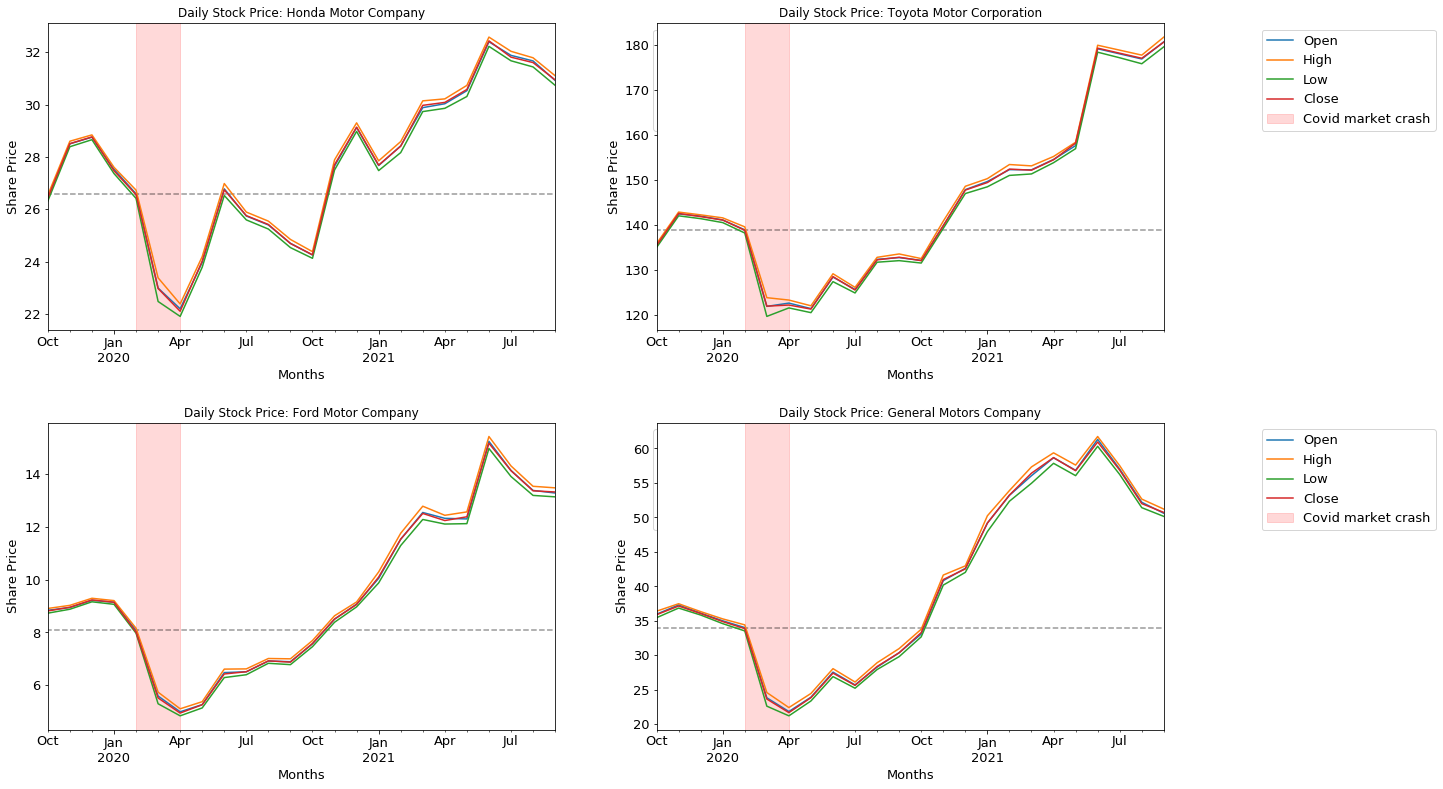

In [409]:
fig = plt.figure(figsize=(20,13))
for i, company in enumerate(Companies):
    axc = fig.add_subplot(2, 2, i+1)
    p = df_Companies_Monthly[company].plot(ax = axc, fontsize=13)
    fig.subplots_adjust(hspace = 0.3)
    p.set_title("Daily Stock Price: %s" % company)
    p.set_xlabel("Months",fontsize=13)
    p.hlines(y=df_Companies_Monthly[company]["Open"][4],xmin = 0, xmax = df_Companies_Monthly[company].index.max() , color="black",linestyles='--', alpha=0.4)
    p.axvspan(df_Companies_Monthly[company].index[4],df_Companies_Monthly[company].index[6], 
           label="Covid market crash",color="red", alpha=0.15)
    p.set_ylabel("Share Price",fontsize=13)
    p.legend(bbox_to_anchor=(1.18, 1), fontsize=fontsize)

after changing the frequency from daily to quarterly, we can see the trend more clearly. the dotted line shows the opening share price of each stock in february 2020, post which the market crashed. 

##### Honda Motor Company 
It is clearly visibe that Honda's stock price took 2 months to recover from the March market crash as the line graph intersected the dotted line around June. It was the first one to recover from the crash. Price of Honda is fluctuating more compared to the rest.

##### Toyota Motor Company 
It took Toyota around 7 months to recover from the market crash as it intersected around November. Post that the price increased gradually. In june there was a drastic increase. 

##### Ford Motor Company 
It took Toyota around 6-7 months to recover from the market crash as it intersected around September. Fords price also increased gradually after that until June when it drastically increased. However the very next month it decreased approximately to the same level as it was in May

##### General Motors Company 
It took Toyota around 6 months to recover from the market crash as it intersected around September. It then gradually increased til June where it reached its peak and started to decrease.

Now we will resample the data and change the frequency from monthly to quarterly to get a more broader trend.


 
### Quarterly Frequancy

below is the code to group the daily data into quarters by taking the average of the stock prices.

In [410]:
df_Companies_quar = {}
for company in Companies:
    groups = df_Companies_ISO[company].groupby(pd.Grouper(freq='QS'))
    df_Companies_quar[company] = groups.agg({'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean'})
    df_Companies_quar[company].head(10)

In [411]:
df_Companies_quar[Companies[3]].tail(15)

,Open,High,Low,Close
Date,,,,
2019-10-01,36.453050,36.739831,36.032542,36.356780
2020-01-01,30.687414,31.173793,29.964310,30.541035
2020-04-01,24.461833,25.000167,23.854000,24.336667
2020-07-01,28.101719,28.650625,27.636094,28.104844
2020-10-01,38.792344,39.406094,38.248594,38.883125
2021-01-01,52.918621,53.941035,51.848965,53.063103
2021-04-01,58.934667,59.562833,58.073333,58.795333
2021-07-01,53.249687,53.772813,52.578593,53.175937


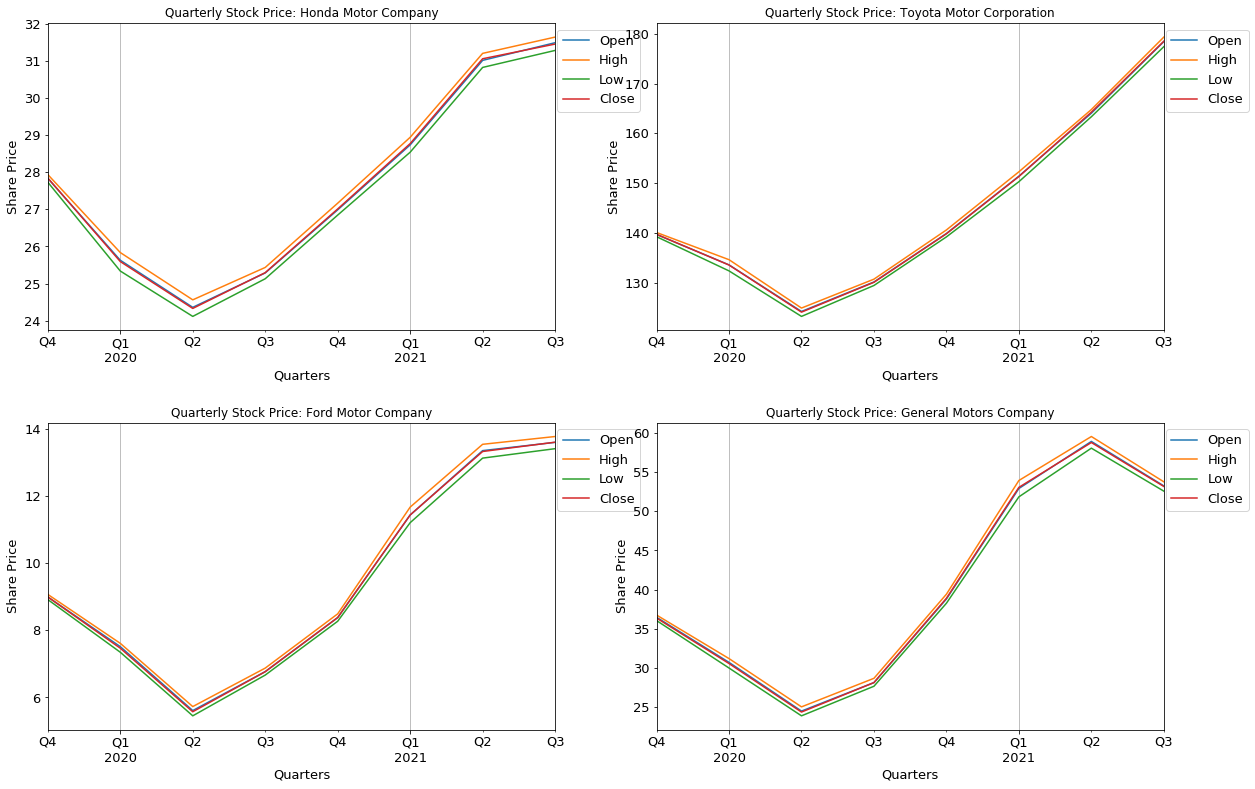

In [412]:
fig = plt.figure(figsize=(20,13))
for i, company in enumerate(Companies):
    axc = fig.add_subplot(2, 2, i+1)
    p = df_Companies_quar[company].plot(ax = axc, fontsize=13)
    fig.subplots_adjust(hspace = 0.3)
    p.set_title("Quarterly Stock Price: %s" % company)
    p.set_xlabel("Quarters",fontsize=13)
    p.set_ylabel("Share Price",fontsize=13);
    p.legend(bbox_to_anchor=(1.18, 1), fontsize=fontsize)
    p.xaxis.grid(True)

##### Honda Motor Company 
the share price went down till the 2nd quarter of 2020 and then increased after that. the Rate at which the price increased suffered a bit in the 2nd and 3rd quarter as the graph curved. 

##### Toyota Motor Company 
the share price went down till the 2nd quarter of 2020 and then increased after that. the rate at which Toyota's share price increased was almost constant the whole time as the graph is similar to a straight line.  

##### Ford Motor Company 
the share price went down till the 2nd quarter of 2020 and then increased after that. It exponencially increased till the first quarter of 2021 after which the rate decreased a bit as there is a curve.

##### General Motors Company 
Same as others, the share price decreased till 2nd quarter of 2020 and then increased after that. It had a steady increase till the first quarter of 2021 after which it peaked in the 2nd. There was afall in the price in the 3rd quarter. 




### Plotting Together

now we will use the quarterly data and plot the opening price if each automobile company in one graph. Below is the fuction which mergers the data by column.

In [413]:
def merge_data_by_column(col_name, df):
    columns = {}
    for company in Companies:
        columns[company] = df[company][col_name]
    df_merged = pd.DataFrame(columns).sort_index()
    return df_merged.dropna()

In [414]:
df_High_merged_quar = merge_data_by_column("Open", df_Companies_quar)
df_High_merged.head(5)

,Honda Motor Company,Toyota Motor Corporation,Ford Motor Company,General Motors Company
Date,,,,
2019-10-01,26.549999,134.630005,9.19,37.470001
2019-10-02,25.850000,132.220001,8.85,35.770000
2019-10-03,25.540001,131.350006,8.55,34.509998
2019-10-04,25.760000,131.350006,8.72,35.000000
2019-10-07,25.250000,131.199997,8.70,34.599998


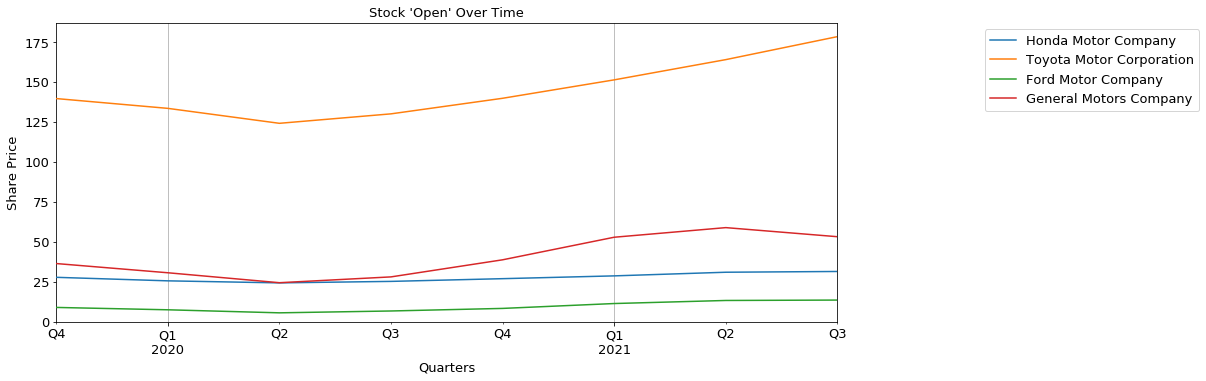

In [415]:
ax = df_High_merged_quar.plot(figsize=(14,5.5), fontsize=fontsize, zorder=3)
ax.set_title("Stock 'Open' Over Time", fontsize=fontsize)
ax.set_xlabel("Quarters", fontsize=fontsize)
ax.set_ylabel("Share Price", fontsize=fontsize)
# adjust the axis limits
ax.set_ylim(0)
ax.set_xlim(df_High_merged_quar.index.min(), df_High_merged_quar.index.max()) 
# move the legend outside the plot
ax.legend(bbox_to_anchor=(1.18, 1), fontsize=fontsize)
# add an x grid
ax.xaxis.grid(True)

The above graph shows that Toyota Motors share price is significantly higher conpared to the rest. Around the second quarter of 2020, General Motor Company's stock price became equal to Honda's However, This quickly changed as the General Motors share price increased again. 

In this graph it is hard to see the fluctuations in the Hondas and Fords stock price as the y-axis range is very high.

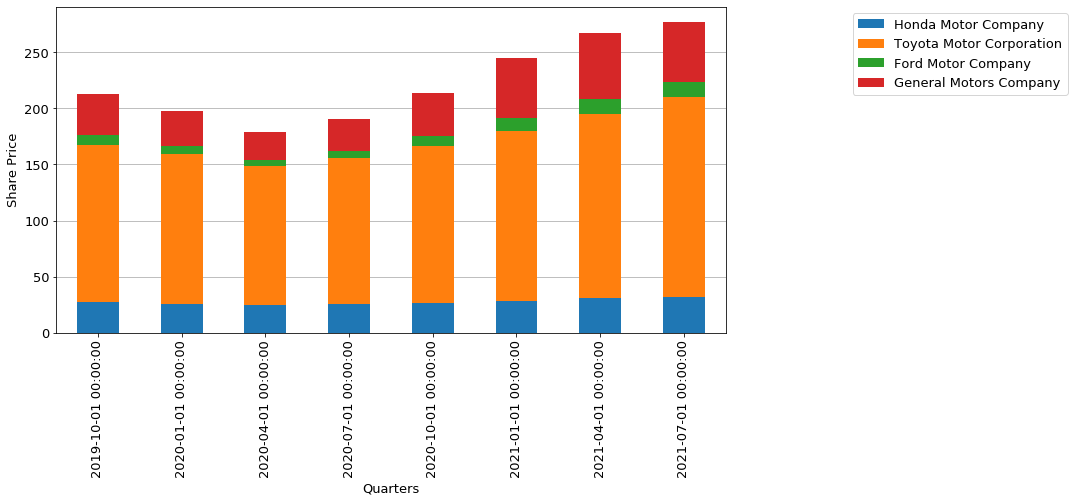

In [416]:
p = df_High_merged_quar.plot(kind='bar',figsize=(12, 6), fontsize=13, stacked=True, zorder=3)
p.set_xlabel("Quarters",fontsize=13)
p.set_ylabel("Share Price",fontsize=13)
p.legend(fontsize=13)
p.legend(bbox_to_anchor=(1.18, 1), fontsize=fontsize)
p.yaxis.grid();

The above graph shows the same information but in a bar graph form. In this graph you can also see how the sum of all the company's share prices changed over time. This follows the same trend like all the quarterly graphs above. the sum decreased till the 2nd quarted then gradually increased after that.

In [417]:
df_overall_increase = {}
for company in Companies:
    df_overall_increase[company] = ((df_Companies_daily[company].at[df_Companies_daily[company].index.max(),"Open"] - df_Companies_daily[company].at[df_Companies_daily[company].index.min(),"Open"])/df_Companies_daily[company].at[df_Companies_daily[company].index.max(),"Close"])*100
    
df_overall_increase
    
    

{'Honda Motor Company': 15.389634822301923,
 'Toyota Motor Corporation': 25.907166244725733,
 'Ford Motor Company': 35.80508474576271,
 'General Motors Company': 29.33029651546758}

## Conclusion

Overall, We can say by looking as all the graphs that the trend between all the Automobile companies was similar. They all got affected by the covid. People thought that car sales would go down. due to this people sold their shares which lead to the market crash. However after april 2020, all the companies saw a gradual increase in their stock prices. By calculating the percentage increase in the share price from the starting date of the data to the end date, it was concluded that Ford Motor company had the highest increase in the stock price which was 36%. 

Although the fetched data required some cleaning like changing months from alphabetical to numerical and removing null values, Working with the data post that was easy and fun. This analysis could have been better if I had access to more automobile company stock prices. higher number of companies would have made this analysis more accurate and would have better captured the trend of the whole automobile segment.

In future This analysis can further be developed to forcast the stock price of automobile companies and help investors with their decision making. 
